In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from metpy.calc import wind_components
from metpy.units import units
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from metpy.plots import Hodograph, SkewT

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
#Bring in new classified arc dataset
Tstorm1 = np.genfromtxt('ML_columns_data/ML_col_newKAMA20151116220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm1 = Tstorm1[1::2, :]

Tstorm2 = np.genfromtxt('ML_columns_data/ML_col_newKDGX2017272031.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm2 = Tstorm2[1::2, :]

Tstorm3 = np.genfromtxt('ML_columns_data/ML_col_newKFDR20175181730.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm3 = Tstorm3[1::2, :]

Tstorm4 = np.genfromtxt('ML_columns_data/ML_col_newKFSD2014618230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm4 = Tstorm4[1::2, :]

Tstorm5 = np.genfromtxt('ML_columns_data/ML_col_newKIND20157132330.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm5 = Tstorm5[1::2, :]

Tstorm6 = np.genfromtxt('ML_columns_data/ML_col_newKMVX2017711220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm6 = Tstorm6[1::2, :]

Tstorm7 = np.genfromtxt('ML_columns_data/ML_col_newKOAX20186112130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm7 = Tstorm7[1::2, :]

Tstorm8 = np.genfromtxt('ML_columns_data/ML_col_newKPOE201742170.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm8 = Tstorm8[1::2, :]

Tstorm9 = np.genfromtxt('ML_columns_data/ML_col_newKINX2016330230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm9 = Tstorm9[1::2, :]

Tstorm10 = np.genfromtxt('ML_columns_data/ML_col_newKOAX2016592030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm10 = Tstorm10[1::2, :]

#All storms after this point are nontornadic

Tstorm11 = np.genfromtxt('ML_columns_data/ML_col_newKDDC2018512130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm11 = Tstorm11[1::2, :]

Tstorm12 = np.genfromtxt('ML_columns_data/ML_col_newKLNX201872220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm12 = Tstorm12[1::2, :]

Tstorm13 = np.genfromtxt('ML_columns_data/ML_col_newKUDX20167181930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm13 = Tstorm13[1::2, :]

Tstorm14 = np.genfromtxt('ML_columns_data/ML_col_newKAMA2015527200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm14 = Tstorm14[1::2, :]

Tstorm15 = np.genfromtxt('ML_columns_data/ML_col_newKSJT20185141930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm15 = Tstorm15[1::2, :]

Tstorm16 = np.genfromtxt('ML_columns_data/ML_col_newKUEX2016524030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm16 = Tstorm16[1::2, :]

Tstorm17 = np.genfromtxt('ML_columns_data/ML_col_newKLBB20164102030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm17 = Tstorm17[1::2, :]

Tstorm18 = np.genfromtxt('ML_columns_data/ML_col_newKTLX2019323220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm18 = Tstorm18[1::2, :]

Tstorm19 = np.genfromtxt('ML_columns_data/ML_col_newKUEX2018511930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm19 = Tstorm19[1::2, :]

Tstorm20 = np.genfromtxt('ML_columns_data/ML_col_newKFDR2016411030.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
Tstorm20 = Tstorm20[1::2, :]

In [3]:
#Train a new forest on the new training data
areas1 = np.concatenate((Tstorm1[:,0], Tstorm2[:,0], Tstorm3[:,0], Tstorm4[:,0],
                         Tstorm5[:,0], Tstorm6[:,0], Tstorm7[:,0], Tstorm8[:,0], Tstorm9[:,0],
                         Tstorm10[:,0], Tstorm11[:,0], Tstorm12[:,0], Tstorm13[:,0],
                         Tstorm14[:,0], Tstorm15[:,0], Tstorm16[:,0], Tstorm17[:,0], 
                         Tstorm18[:,0], Tstorm19[:,0], Tstorm20[:,0]))

distances1 = np.concatenate((Tstorm1[:,1], Tstorm2[:,1], Tstorm3[:,1], Tstorm4[:,1],
                         Tstorm5[:,1], Tstorm6[:,1], Tstorm7[:,1], Tstorm8[:,1], Tstorm9[:,1],
                         Tstorm10[:,1], Tstorm11[:,1], Tstorm12[:,1], Tstorm13[:,1],
                         Tstorm14[:,1], Tstorm15[:,1], Tstorm16[:,1], Tstorm17[:,1], 
                         Tstorm18[:,1], Tstorm19[:,1], Tstorm20[:,1]))

angles1= np.concatenate((Tstorm1[:,2], Tstorm2[:,2], Tstorm3[:,2], Tstorm4[:,2],
                         Tstorm5[:,2], Tstorm6[:,2], Tstorm7[:,2], Tstorm8[:,2], Tstorm9[:,2],
                         Tstorm10[:,2], Tstorm11[:,2], Tstorm12[:,2], Tstorm13[:,2],
                         Tstorm14[:,2], Tstorm15[:,2], Tstorm16[:,2], Tstorm17[:,2], 
                         Tstorm18[:,2], Tstorm19[:,2], Tstorm20[:,2]))

means1= np.concatenate((Tstorm1[:,3], Tstorm2[:,3], Tstorm3[:,3], Tstorm4[:,3],
                         Tstorm5[:,3], Tstorm6[:,3], Tstorm7[:,3], Tstorm8[:,3], Tstorm9[:,3],
                         Tstorm10[:,3], Tstorm11[:,3], Tstorm12[:,3], Tstorm13[:,3],
                         Tstorm14[:,3], Tstorm15[:,3], Tstorm16[:,3], Tstorm17[:,3], 
                         Tstorm18[:,3], Tstorm19[:,3], Tstorm20[:,3]))

maxes1= np.concatenate((Tstorm1[:,4], Tstorm2[:,4], Tstorm3[:,4], Tstorm4[:,4],
                         Tstorm5[:,4], Tstorm6[:,4], Tstorm7[:,4], Tstorm8[:,4], Tstorm9[:,4],
                         Tstorm10[:,4], Tstorm11[:,4], Tstorm12[:,4], Tstorm13[:,4],
                         Tstorm14[:,4], Tstorm15[:,4], Tstorm16[:,4], Tstorm17[:,4], 
                         Tstorm18[:,4], Tstorm19[:,4], Tstorm20[:,4]))

mean_ccs1= np.concatenate((Tstorm1[:,5], Tstorm2[:,5], Tstorm3[:,5], Tstorm4[:,5],
                         Tstorm5[:,5], Tstorm6[:,5], Tstorm7[:,5], Tstorm8[:,5], Tstorm9[:,5],
                         Tstorm10[:,5], Tstorm11[:,5], Tstorm12[:,5], Tstorm13[:,5],
                         Tstorm14[:,5], Tstorm15[:,5], Tstorm16[:,5], Tstorm17[:,5], 
                         Tstorm18[:,5], Tstorm19[:,5], Tstorm20[:,5]))

mean_kdps1= np.concatenate((Tstorm1[:,6], Tstorm2[:,6], Tstorm3[:,6], Tstorm4[:,6],
                         Tstorm5[:,6], Tstorm6[:,6], Tstorm7[:,6], Tstorm8[:,6], Tstorm9[:,6],
                         Tstorm10[:,6], Tstorm11[:,6], Tstorm12[:,6], Tstorm13[:,6],
                         Tstorm14[:,6], Tstorm15[:,6], Tstorm16[:,6], Tstorm17[:,6], 
                         Tstorm18[:,6], Tstorm19[:,6], Tstorm20[:,6]))

mean_zs1= np.concatenate((Tstorm1[:,7], Tstorm2[:,7], Tstorm3[:,7], Tstorm4[:,7],
                         Tstorm5[:,7], Tstorm6[:,7], Tstorm7[:,7], Tstorm8[:,7], Tstorm9[:,7],
                         Tstorm10[:,7], Tstorm11[:,7], Tstorm12[:,7], Tstorm13[:,7],
                         Tstorm14[:,7], Tstorm15[:,7], Tstorm16[:,7], Tstorm17[:,7], 
                         Tstorm18[:,7], Tstorm19[:,7], Tstorm20[:,7]))

mean_graddirs1= np.concatenate((Tstorm1[:,8], Tstorm2[:,8], Tstorm3[:,8], Tstorm4[:,8],
                         Tstorm5[:,8], Tstorm6[:,8], Tstorm7[:,8], Tstorm8[:,8], Tstorm9[:,8],
                         Tstorm10[:,8], Tstorm11[:,8], Tstorm12[:,8], Tstorm13[:,8],
                         Tstorm14[:,8], Tstorm15[:,8], Tstorm16[:,8], Tstorm17[:,8], 
                         Tstorm18[:,8], Tstorm19[:,8], Tstorm20[:,8]))

mean_grads1= np.concatenate((Tstorm1[:,9], Tstorm2[:,9], Tstorm3[:,9], Tstorm4[:,9],
                         Tstorm5[:,9], Tstorm6[:,9], Tstorm7[:,9], Tstorm8[:,9], Tstorm9[:,9],
                         Tstorm10[:,9], Tstorm11[:,9], Tstorm12[:,9], Tstorm13[:,9],
                         Tstorm14[:,9], Tstorm15[:,9], Tstorm16[:,9], Tstorm17[:,9], 
                         Tstorm18[:,9], Tstorm19[:,9], Tstorm20[:,9]))

max_depths1= np.concatenate((Tstorm1[:,10], Tstorm2[:,10], Tstorm3[:,10], Tstorm4[:,10],
                         Tstorm5[:,10], Tstorm6[:,10], Tstorm7[:,10], Tstorm8[:,10], Tstorm9[:,10],
                         Tstorm10[:,10], Tstorm11[:,10], Tstorm12[:,10], Tstorm13[:,10],
                         Tstorm14[:,10], Tstorm15[:,10], Tstorm16[:,10], Tstorm17[:,10], 
                         Tstorm18[:,10], Tstorm19[:,10], Tstorm20[:,10]))

mean_depths1= np.concatenate((Tstorm1[:,11], Tstorm2[:,11], Tstorm3[:,11], Tstorm4[:,11],
                         Tstorm5[:,11], Tstorm6[:,11], Tstorm7[:,11], Tstorm8[:,11], Tstorm9[:,11],
                         Tstorm10[:,11], Tstorm11[:,11], Tstorm12[:,11], Tstorm13[:,11],
                         Tstorm14[:,11], Tstorm15[:,11], Tstorm16[:,11], Tstorm17[:,11], 
                         Tstorm18[:,11], Tstorm19[:,11], Tstorm20[:,11]))

mean_col_kdps1= np.concatenate((Tstorm1[:,12], Tstorm2[:,12], Tstorm3[:,12], Tstorm4[:,12],
                         Tstorm5[:,12], Tstorm6[:,12], Tstorm7[:,12], Tstorm8[:,12], Tstorm9[:,12],
                         Tstorm10[:,12], Tstorm11[:,12], Tstorm12[:,12], Tstorm13[:,12],
                         Tstorm14[:,12], Tstorm15[:,12], Tstorm16[:,12], Tstorm17[:,12], 
                         Tstorm18[:,12], Tstorm19[:,12], Tstorm20[:,12]))

storm_areas1= np.concatenate((Tstorm1[:,13], Tstorm2[:,13], Tstorm3[:,13], Tstorm4[:,13],
                         Tstorm5[:,13], Tstorm6[:,13], Tstorm7[:,13], Tstorm8[:,13], Tstorm9[:,13],
                         Tstorm10[:,13], Tstorm11[:,13], Tstorm12[:,13], Tstorm13[:,13],
                         Tstorm14[:,13], Tstorm15[:,13], Tstorm16[:,13], Tstorm17[:,13], 
                         Tstorm18[:,13], Tstorm19[:,13], Tstorm20[:,13]))

columns1= np.concatenate((Tstorm1[:,14], Tstorm2[:,14], Tstorm3[:,14], Tstorm4[:,14],
                         Tstorm5[:,14], Tstorm6[:,14], Tstorm7[:,14], Tstorm8[:,14], Tstorm9[:,14],
                         Tstorm10[:,14], Tstorm11[:,14], Tstorm12[:,14], Tstorm13[:,14],
                         Tstorm14[:,14], Tstorm15[:,14], Tstorm16[:,14], Tstorm17[:,14], 
                         Tstorm18[:,14], Tstorm19[:,14], Tstorm20[:,14]))

In [4]:
directions_raw1 = angles1
directions_raw1[directions_raw1 > 0] = 360 - directions_raw1[directions_raw1 > 0]
directions_raw1[directions_raw1 < 0] = (-1) * directions_raw1[directions_raw1 < 0]
#xc, yc = get_wind_components(distances, directions_raw * units('degree'))
storm_areas1[storm_areas1<200] = 200
storm_areas1[storm_areas1>1000] = 1000
distances_norm1 = distances1/np.sqrt(storm_areas1/np.pi)
xc1, yc1 = wind_components(distances_norm1*units('m/s'), directions_raw1 * units('degree'))
xc1 = xc1.magnitude
yc1 = yc1.magnitude

In [5]:
COL_X1 = np.zeros((len(areas1), 15))
COL_Y1 = columns1

In [6]:
#Set values for COL_X
COL_X1[:,0] = areas1
COL_X1[:,1] = distances_norm1
COL_X1[:,2] = means1
COL_X1[:,3] = maxes1
COL_X1[:,4] = mean_ccs1
COL_X1[:,5] = mean_kdps1
COL_X1[:,6] = mean_zs1
COL_X1[:,7] = mean_graddirs1
COL_X1[:,8] = mean_grads1
COL_X1[:,9] = max_depths1
COL_X1[:,10] = mean_depths1
COL_X1[:,11] = mean_col_kdps1
COL_X1[:,12] = storm_areas1
COL_X1[:,13] = xc1
COL_X1[:,14] = yc1
#Include divided fields
#ARC_X[:,12] = maxes / means
#ARC_X[:,13] = (maxes/means) * areas

In [7]:
#ARC_X = np.zeros((len(areas), 12))
#ARC_Y = arcs
print(COL_X1[np.isnan(COL_X1)])
COL_X1[np.isnan(COL_X1)]=-9999

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [8]:
print(COL_X1[np.isnan(COL_X1)])
print(COL_Y1[np.isnan(COL_Y1)])
print(np.where(COL_Y1>1))

[]
[]
(array([], dtype=int64),)


In [9]:
forest_new = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
trainX_COL1, testX_COL1, trainY_COL1, testY_COL1 = train_test_split(COL_X1, COL_Y1, test_size = 0.3, random_state=123)
forest_new.fit(trainX_COL1, trainY_COL1)
print('Accuracy: \n', forest_new.score(testX_COL1, testY_COL1))
pred_new = forest_new.predict(testX_COL1)
pred_whole_dataset_new = forest_new.predict(COL_X1)

Accuracy: 
 0.9147869674185464


In [10]:
print(COL_Y1[COL_Y1==1].shape)
print(COL_Y1[COL_Y1<1].shape)


(688,)
(642,)


In [11]:
#Try the k-fold testing
kf1 = KFold(n_splits=10, random_state=123, shuffle=True)
kf1.get_n_splits(COL_X1, COL_Y1)

10

In [12]:
accuracies_new = []
pods_new = []
fars_new = []
for train_index, test_index in kf1.split(COL_X1, COL_Y1):
    #print(train_index.shape)
    #print(test_index.shape)
    trainX_COL1 = COL_X1[train_index]
    testX_COL1 = COL_X1[test_index]
    trainY_COL1 = COL_Y1[train_index]
    testY_COL1 = COL_Y1[test_index]

    print(trainX_COL1.shape)
    forest_new.fit(trainX_COL1, trainY_COL1)
    #print(forest1.oob_score.real)
    print('Accuracy: \n', forest_new.score(testX_COL1, testY_COL1))
    pred_test_new = forest_new.predict(testX_COL1)
    true_pos_new = np.zeros((len(testY_COL1)))
    false_pos_new = np.zeros((len(testY_COL1)))
    for k in range(len(testY_COL1)):
        if (testY_COL1[k]==1 and pred_test_new[k]==1):
            true_pos_new[k] = 1
        if (testY_COL1[k]==0 and pred_test_new[k]==1):
            false_pos_new[k] = 1
    pod_n = np.shape(true_pos_new[true_pos_new==1])[0]/np.shape(testY_COL1[testY_COL1==1])[0]
    far_n = np.shape(false_pos_new[false_pos_new==1])[0]/np.shape(testY_COL1[testY_COL1==1])[0]

    print('POD ', pod_n)
    print('FAR ', far_n)

    pods_new.append(pod_n)
    fars_new.append(far_n)
    accuracies_new.append(forest_new.score(testX_COL1, testY_COL1))

(1197, 15)
Accuracy: 
 0.8721804511278195
POD  0.8307692307692308
FAR  0.09230769230769231
(1197, 15)
Accuracy: 
 0.9172932330827067
POD  0.9166666666666666
FAR  0.06944444444444445
(1197, 15)
Accuracy: 
 0.924812030075188
POD  0.9473684210526315
FAR  0.12280701754385964
(1197, 15)
Accuracy: 
 0.9097744360902256
POD  0.9027777777777778
FAR  0.06944444444444445
(1197, 15)
Accuracy: 
 0.9097744360902256
POD  0.8987341772151899
FAR  0.05063291139240506
(1197, 15)
Accuracy: 
 0.924812030075188
POD  0.9298245614035088
FAR  0.10526315789473684
(1197, 15)
Accuracy: 
 0.8721804511278195
POD  0.8552631578947368
FAR  0.07894736842105263
(1197, 15)
Accuracy: 
 0.8947368421052632
POD  0.9027777777777778
FAR  0.09722222222222222
(1197, 15)
Accuracy: 
 0.8947368421052632
POD  0.8933333333333333
FAR  0.08
(1197, 15)
Accuracy: 
 0.9172932330827067
POD  0.9365079365079365
FAR  0.1111111111111111


In [13]:
print(testY_COL1.shape)
print(pred_test_new.shape)

(133,)
(133,)


In [14]:
#Train a forest on the whole new training dataset
forest_all = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_all.fit(COL_X1, COL_Y1)

RandomForestClassifier(oob_score=True, random_state=123)

In [15]:
print(np.mean(accuracies_new))
print(np.mean(pods_new))
print(np.mean(fars_new))

0.9037593984962407
0.901402304039879
0.08771803697819687


In [16]:
print(forest_all.feature_importances_)

[0.06350299 0.18187023 0.02939439 0.03883988 0.03404525 0.0262791
 0.04769728 0.10329786 0.06635101 0.02339201 0.03404012 0.02107625
 0.03838804 0.10969425 0.18213134]


In [17]:
#Bring in zdr arc data
stormA = np.genfromtxt('ML_columns_test/ML_col_newKBIS201383100.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormA = stormA[1::2, :]

stormB = np.genfromtxt('ML_columns_test/ML_col_newKFDR2013417220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormB = stormB[1::2, :]

stormBB = np.genfromtxt('ML_columns_test/ML_col_newKINX20135202024.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormBB = stormBB[1::2, :]

stormC = np.genfromtxt('ML_columns_test/ML_col_newKDGX201312202240.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormC = stormC[1::2, :]

stormCC = np.genfromtxt('ML_columns_test/ML_col_newKLBB20136192210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormCC = stormCC[1::2, :]

stormD = np.genfromtxt('ML_columns_test/ML_col_newKFFC201233115.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormD = stormD[1::2, :]

stormDD = np.genfromtxt('ML_columns_test/ML_col_newKLOT201311171750.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormDD = stormDD[1::2, :]

stormEE = np.genfromtxt('ML_columns_test/ML_col_newKMQT20126900.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormEE = stormEE[1::2, :]

stormF = np.genfromtxt('ML_columns_test/ML_col_newKHTX201232150.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormF = stormF[1::2, :]

stormFF = np.genfromtxt('ML_columns_test/ML_col_newKOHX20124262330.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormFF = stormFF[1::2, :]

#stormG = np.genfromtxt('Machine_Learning/ML_wedgesKFDR2013417220_F.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,15,16,17))
#stormG = stormA[1::2, :]

stormH = np.genfromtxt('ML_columns_test/ML_col_newKEAX2013520210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormH = stormH[1::2, :]

stormHH = np.genfromtxt('ML_columns_test/ML_col_newKSRX2013331320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormHH = stormHH[1::2, :]

stormI = np.genfromtxt('ML_columns_test/ML_col_newKFFC20133182125.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormI = stormI[1::2, :]

stormII = np.genfromtxt('ML_columns_test/ML_col_newKTLX2013531230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormII = stormII[1::2, :]

stormJ = np.genfromtxt('ML_columns_test/ML_col_newKDDC2012430220.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormJ = stormJ[1::2, :]

stormK = np.genfromtxt('ML_columns_test/ML_col_newKEWX2012510180.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormK = stormK[1::2, :]

stormL = np.genfromtxt('ML_columns_test/ML_col_newKHPX20131117210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormL = stormL[1::2, :]

stormM = np.genfromtxt('ML_columns_test/ML_col_newKSHV20132182243.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormM = stormM[1::2, :]

stormO = np.genfromtxt('ML_columns_test/ML_col_newKTWX2012415014.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormO = stormO[1::2, :]

stormR = np.genfromtxt('ML_columns_test/ML_col_newKFWS2013515230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormR = stormR[1::2, :]

stormS = np.genfromtxt('ML_columns_test/ML_col_newKIND20131117200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormS = stormS[1::2, :]

stormW = np.genfromtxt('ML_columns_test/ML_col_newKAMA20138142326.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormW = stormW[1::2, :]

stormX = np.genfromtxt('ML_columns_test/ML_col_newKJAX20135509.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormX = stormX[1::2, :]

stormY = np.genfromtxt('ML_columns_test/ML_col_newKVWX201311171915.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormY = stormY[1::2, :]

stormZ = np.genfromtxt('ML_columns_test/ML_col_newKINX2013531011.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
stormZ = stormZ[1::2, :]

#Add the nontornadic storms
#storm7 = np.genfromtxt('ML_columns_test/ML_col_newKAMA2012430425.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
#storm7 = storm7[1::2, :]

storm13 = np.genfromtxt('ML_columns_test/ML_col_newKDDC201310141938.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm13 = storm13[1::2, :]

storm14 = np.genfromtxt('ML_columns_test/ML_col_newKDGX2013318200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm14 = storm14[1::2, :]

storm16 = np.genfromtxt('ML_columns_test/ML_col_newKDTX20136171930.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm16 = storm16[1::2, :]

storm19 = np.genfromtxt('ML_columns_test/ML_col_newKFWS2013102700.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm19 = storm19[1::2, :]

storm23 = np.genfromtxt('ML_columns_test/ML_col_newKLOT2014521130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm23 = storm23[1::2, :]

storm24 = np.genfromtxt('ML_columns_test/ML_col_newKMPX201386230.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm24 = storm24[1::2, :]

storm26 = np.genfromtxt('ML_columns_test/ML_col_newKSGF2013472310.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm26 = storm26[1::2, :]

storm27 = np.genfromtxt('ML_columns_test/ML_col_newKABR2013792320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm27 = storm27[1::2, :]

storm28 = np.genfromtxt('ML_columns_test/ML_col_newKDMX2013521130.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm28 = storm28[1::2, :]

storm29 = np.genfromtxt('ML_columns_test/ML_col_newKUDX2013525210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm29 = storm29[1::2, :]

storm30 = np.genfromtxt('ML_columns_test/ML_col_newKUDX2013723200.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm30 = storm30[1::2, :]

storm32 = np.genfromtxt('ML_columns_test/ML_col_newKFTG2014520210.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm32 = storm32[1::2, :]

storm1 = np.genfromtxt('ML_columns_test/ML_col_newKTLX201342710.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm1 = storm1[1::2, :]

storm3 = np.genfromtxt('ML_columns_test/ML_col_newKTLX2013530189.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm3 = storm3[1::2, :]

storm5 = np.genfromtxt('ML_columns_test/ML_col_newKVNX20134222320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm5 = storm5[1::2, :]

storm10 = np.genfromtxt('ML_columns_test/ML_col_newKBIS201494520.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm10 = storm10[1::2, :]

storm21 = np.genfromtxt('ML_columns_test/ML_col_newKICT20144320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
storm21 = storm21[1::2, :]

# storm2 = np.genfromtxt('ML_columns_test/ML_col_newKTLX201342710.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
# storm2 = storm2[1::2, :]

# storm4 = np.genfromtxt('ML_columns_test/ML_col_newKTLX2013530189.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
# storm4 = storm4[1::2, :]

# storm6 = np.genfromtxt('ML_columns_test/ML_col_newKVNX20134222320.csv', skip_header=1, delimiter=',', usecols=(3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))
# storm6 = storm6[1::2, :]

In [18]:
#With whole tornadic dataset and nontornadic cells listed above
#Storm 7 has been temporatily removed from the nontornadic dataset but can be added back in once it's 
#been run with calibration
areas = np.concatenate((stormA[:,0], stormB[:,0], stormBB[:,0], stormC[:,0], stormCC[:,0], stormD[:,0], 
                        stormDD[:,0], stormEE[:,0], stormF[:,0], stormFF[:,0], stormH[:,0], stormHH[:,0], 
                        stormI[:,0], stormII[:,0], stormJ[:,0], stormK[:,0], stormL[:,0], stormM[:,0], 
                        stormO[:,0], stormR[:,0], stormS[:,0], stormW[:,0], stormX[:,0], stormY[:,0], 
                        stormZ[:,0], storm13[:,0], storm14[:,0], storm16[:,0], storm19[:,0], 
                        storm23[:,0], storm24[:,0], storm26[:,0], storm27[:,0], storm28[:,0], storm29[:,0], 
                        storm30[:,0], storm32[:,0], storm1[:,0], storm3[:,0], storm5[:,0], storm10[:,0], 
                        storm21[:,0]))

distances = np.concatenate((stormA[:,1], stormB[:,1], stormBB[:,1], stormC[:,1], stormCC[:,1], stormD[:,1], 
                            stormDD[:,1], stormEE[:,1], stormF[:,1], stormFF[:,1], stormH[:,1], stormHH[:,1],
                            stormI[:,1], stormII[:,1], stormJ[:,1], stormK[:,1], stormL[:,1], stormM[:,1], 
                            stormO[:,1], stormR[:,1], stormS[:,1], stormW[:,1], stormX[:,1], stormY[:,1], 
                            stormZ[:,1], storm13[:,1], storm14[:,1], storm16[:,1], storm19[:,1], 
                            storm23[:,1], storm24[:,1], storm26[:,1], storm27[:,1], storm28[:,1], storm29[:,1], 
                            storm30[:,1], storm32[:,1], storm1[:,1], storm3[:,1], storm5[:,1], storm10[:,1], 
                            storm21[:,1]))

angles = np.concatenate((stormA[:,2], stormB[:,2], stormBB[:,2], stormC[:,2], stormCC[:,2], stormD[:,2], 
                         stormDD[:,2], stormEE[:,2], stormF[:,2], stormFF[:,2], stormH[:,2], stormHH[:,2], 
                         stormI[:,2], stormII[:,2], stormJ[:,2], stormK[:,2], stormL[:,2], stormM[:,2], 
                         stormO[:,2], stormR[:,2], stormS[:,2], stormW[:,2], stormX[:,2], stormY[:,2], 
                         stormZ[:,2], storm13[:,2], storm14[:,2], storm16[:,2], storm19[:,2], 
                         storm23[:,2], storm24[:,2], storm26[:,2], storm27[:,2], storm28[:,2], storm29[:,2], 
                         storm30[:,2], storm32[:,2], storm1[:,2], storm3[:,2], storm5[:,2], storm10[:,2], 
                         storm21[:,2]))

means = np.concatenate((stormA[:,3], stormB[:,3], stormBB[:,3], stormC[:,3], stormCC[:,3], stormD[:,3], 
                        stormDD[:,3], stormEE[:,3], stormF[:,3], stormFF[:,3], stormH[:,3], stormHH[:,3], 
                        stormI[:,3], stormII[:,3], stormJ[:,3], stormK[:,3], stormL[:,3], stormM[:,3], 
                        stormO[:,3], stormR[:,3], stormS[:,3], stormW[:,3], stormX[:,3], stormY[:,3], stormZ[:,3], 
                        storm13[:,3], storm14[:,3], storm16[:,3], storm19[:,3], storm23[:,3], 
                        storm24[:,3], storm26[:,3], storm27[:,3], storm28[:,3], storm29[:,3], storm30[:,3], 
                        storm32[:,3], storm1[:,3], storm3[:,3], storm5[:,3], storm10[:,3], storm21[:,3]))#, 
                        #storm2[:,3], storm4[:,3], storm6[:,3]))

maxes = np.concatenate((stormA[:,4], stormB[:,4], stormBB[:,4], stormC[:,4], stormCC[:,4], stormD[:,4], 
                        stormDD[:,4], stormEE[:,4], stormF[:,4], stormFF[:,4], stormH[:,4], stormHH[:,4], 
                        stormI[:,4], stormII[:,4], stormJ[:,4], stormK[:,4], stormL[:,4], stormM[:,4], 
                        stormO[:,4], stormR[:,4], stormS[:,4], stormW[:,4], stormX[:,4], stormY[:,4], 
                        stormZ[:,4], storm13[:,4], storm14[:,4], storm16[:,4], storm19[:,4], 
                        storm23[:,4], storm24[:,4], storm26[:,4], storm27[:,4], storm28[:,4], storm29[:,4], 
                        storm30[:,4], storm32[:,4], storm1[:,4], storm3[:,4], storm5[:,4], storm10[:,4], 
                        storm21[:,4]))#, storm2[:,4], storm4[:,4], storm6[:,4]))

mean_ccs = np.concatenate((stormA[:,5], stormB[:,5], stormBB[:,5], stormC[:,5], stormCC[:,5], stormD[:,5], 
                           stormDD[:,5], stormEE[:,5], stormF[:,5], stormFF[:,5], stormH[:,5], stormHH[:,5], 
                           stormI[:,5], stormII[:,5], stormJ[:,5], stormK[:,5], stormL[:,5], stormM[:,5], 
                           stormO[:,5], stormR[:,5], stormS[:,5], stormW[:,5], stormX[:,5], stormY[:,5], 
                           stormZ[:,5], storm13[:,5], storm14[:,5], storm16[:,5], storm19[:,5], 
                           storm23[:,5], storm24[:,5], storm26[:,5], storm27[:,5], storm28[:,5], storm29[:,5], 
                           storm30[:,5], storm32[:,5], storm1[:,5], storm3[:,5], storm5[:,5], storm10[:,5], 
                           storm21[:,5]))#, storm2[:,5], storm4[:,5], storm6[:,5]))

mean_kdps = np.concatenate((stormA[:,6], stormB[:,6], stormBB[:,6], stormC[:,6], stormCC[:,6], stormD[:,6], 
                            stormDD[:,6], stormEE[:,6], stormF[:,6], stormFF[:,6], stormH[:,6], stormHH[:,6], 
                            stormI[:,6], stormII[:,6], stormJ[:,6], stormK[:,6], stormL[:,6], stormM[:,6], 
                            stormO[:,6], stormR[:,6], stormS[:,6], stormW[:,6], stormX[:,6], stormY[:,6], 
                            stormZ[:,6], storm13[:,6], storm14[:,6], storm16[:,6], storm19[:,6], 
                            storm23[:,6], storm24[:,6], storm26[:,6], storm27[:,6], storm28[:,6], storm29[:,6], 
                            storm30[:,6], storm32[:,6], storm1[:,6], storm3[:,6], storm5[:,6], storm10[:,6], 
                            storm21[:,6]))

mean_zs = np.concatenate((stormA[:,7], stormB[:,7], stormBB[:,7], stormC[:,7], stormCC[:,7], stormD[:,7], 
                          stormDD[:,7], stormEE[:,7], stormF[:,7], stormFF[:,7], stormH[:,7], stormHH[:,7], 
                          stormI[:,7], stormII[:,7], stormJ[:,7], stormK[:,7], stormL[:,7], stormM[:,7], 
                          stormO[:,7], stormR[:,7], stormS[:,7], stormW[:,7], stormX[:,7], stormY[:,7], stormZ[:,7], 
                          storm13[:,7], storm14[:,7], storm16[:,7], storm19[:,7], storm23[:,7], 
                          storm24[:,7], storm26[:,7], storm27[:,7], storm28[:,7], storm29[:,7], storm30[:,7], 
                          storm32[:,7], storm1[:,7], storm3[:,7], storm5[:,7], storm10[:,7], storm21[:,7]))#, 
                          #storm2[:,7], storm4[:,7], storm6[:,7]))

mean_graddirs = np.concatenate((stormA[:,8], stormB[:,8], stormBB[:,8], stormC[:,8], stormCC[:,8], stormD[:,8], 
                                stormDD[:,8], stormEE[:,8], stormF[:,8], stormFF[:,8], stormH[:,8], stormHH[:,8], 
                                stormI[:,8], stormII[:,8], stormJ[:,8], stormK[:,8], stormL[:,8], stormM[:,8], 
                                stormO[:,8], stormR[:,8], stormS[:,8], stormW[:,8], stormX[:,8], stormY[:,8], 
                                stormZ[:,8], storm13[:,8], storm14[:,8], storm16[:,8], storm19[:,8], 
                                storm23[:,8], storm24[:,8], storm26[:,8], storm27[:,8], storm28[:,8], storm29[:,8], 
                                storm30[:,8], storm32[:,8], storm1[:,8], storm3[:,8], storm5[:,8], storm10[:,8], 
                                storm21[:,8]))#, storm2[:,8], storm4[:,8], storm6[:,8]))

mean_grads = np.concatenate((stormA[:,9], stormB[:,9], stormBB[:,9], stormC[:,9], stormCC[:,9], stormD[:,9], 
                             stormDD[:,9], stormEE[:,9], stormF[:,9], stormFF[:,9], stormH[:,9], stormHH[:,9], 
                             stormI[:,9], stormII[:,9], stormJ[:,9], stormK[:,9], stormL[:,9], stormM[:,9], 
                             stormO[:,9], stormR[:,9], stormS[:,9], stormW[:,9], stormX[:,9], stormY[:,9], 
                             stormZ[:,9], storm13[:,9], storm14[:,9], storm16[:,9], storm19[:,9], 
                             storm23[:,9], storm24[:,9], storm26[:,9], storm27[:,9], storm28[:,9], storm29[:,9], 
                             storm30[:,9], storm32[:,9], storm1[:,9], storm3[:,9], storm5[:,9], storm10[:,9], 
                             storm21[:,9]))#, storm2[:,9], storm4[:,9], storm6[:,9]))

max_depths = np.concatenate((stormA[:,10], stormB[:,10], stormBB[:,10], stormC[:,10], stormCC[:,10], 
                             stormD[:,10], stormDD[:,10], stormEE[:,10], stormF[:,10], stormFF[:,10], stormH[:,10], 
                             stormHH[:,10], stormI[:,10], stormII[:,10], stormJ[:,10], stormK[:,10], stormL[:,10], 
                             stormM[:,10], stormO[:,10], stormR[:,10], stormS[:,10], stormW[:,10], stormX[:,10], 
                             stormY[:,10], stormZ[:,10], storm13[:,10], storm14[:,10], storm16[:,10], 
                             storm19[:,10], storm23[:,10], storm24[:,10], storm26[:,10], storm27[:,10], storm28[:,10], 
                             storm29[:,10], storm30[:,10], storm32[:,10], storm1[:,10], storm3[:,10], storm5[:,10], 
                             storm10[:,10], storm21[:,10]))#, storm2[:,10], storm4[:,10], storm6[:,10]))

mean_depths = np.concatenate((stormA[:,11], stormB[:,11], stormBB[:,11], stormC[:,11], stormCC[:,11], stormD[:,11], 
                       stormDD[:,11], stormEE[:,11], stormF[:,11], stormFF[:,11], stormH[:,11], stormHH[:,11], 
                       stormI[:,11], stormII[:,11], stormJ[:,11], stormK[:,11], stormL[:,11], stormM[:,11], 
                       stormO[:,11], stormR[:,11], stormS[:,11], stormW[:,11], stormX[:,11], stormY[:,11], 
                       stormZ[:,11], storm13[:,11], storm14[:,11], storm16[:,11], storm19[:,11], 
                       storm23[:,11], storm24[:,11], storm26[:,11], storm27[:,11], storm28[:,11], storm29[:,11], 
                       storm30[:,11], storm32[:,11], storm1[:,11], storm3[:,11], storm5[:,11], storm10[:,11], 
                       storm21[:,11]))#, storm2[:,11], storm4[:,11], storm6[:,11]))

mean_col_kdps = np.concatenate((stormA[:,12], stormB[:,12], stormBB[:,12], stormC[:,12], stormCC[:,12], 
                             stormD[:,12], stormDD[:,12], stormEE[:,12], stormF[:,12], stormFF[:,12], stormH[:,12], 
                             stormHH[:,12], stormI[:,12], stormII[:,12], stormJ[:,12], stormK[:,12], stormL[:,12], 
                             stormM[:,12], stormO[:,12], stormR[:,12], stormS[:,12], stormW[:,12], stormX[:,12], 
                             stormY[:,12], stormZ[:,12], storm13[:,12], storm14[:,12], storm16[:,12], 
                             storm19[:,12], storm23[:,12], storm24[:,12], storm26[:,12], storm27[:,12], storm28[:,12], 
                             storm29[:,12], storm30[:,12], storm32[:,12], storm1[:,12], storm3[:,12], storm5[:,12], 
                             storm10[:,12], storm21[:,12]))#, storm2[:,12], storm4[:,12], storm6[:,12]))


storm_areas = np.concatenate((stormA[:,13], stormB[:,13], stormBB[:,13], stormC[:,13], stormCC[:,13], 
                             stormD[:,13], stormDD[:,13], stormEE[:,13], stormF[:,13], stormFF[:,13], stormH[:,13], 
                             stormHH[:,13], stormI[:,13], stormII[:,13], stormJ[:,13], stormK[:,13], stormL[:,13], 
                             stormM[:,13], stormO[:,13], stormR[:,13], stormS[:,13], stormW[:,13], stormX[:,13], 
                             stormY[:,13], stormZ[:,13], storm13[:,13], storm14[:,13], storm16[:,13], 
                             storm19[:,13], storm23[:,13], storm24[:,13], storm26[:,13], storm27[:,13], storm28[:,13], 
                             storm29[:,13], storm30[:,13], storm32[:,13], storm1[:,13], storm3[:,13], storm5[:,13], 
                             storm10[:,13], storm21[:,13]))#, storm2[:,13], storm4[:,13], storm6[:,13]))

columns = np.concatenate((stormA[:,14], stormB[:,14], stormBB[:,14], stormC[:,14], stormCC[:,14], stormD[:,14], 
                       stormDD[:,14], stormEE[:,14], stormF[:,14], stormFF[:,14], stormH[:,14], stormHH[:,14], 
                       stormI[:,14], stormII[:,14], stormJ[:,14], stormK[:,14], stormL[:,14], stormM[:,14], 
                       stormO[:,14], stormR[:,14], stormS[:,14], stormW[:,14], stormX[:,14], stormY[:,14], 
                       stormZ[:,14], storm13[:,14], storm14[:,14], storm16[:,14], storm19[:,14], 
                       storm23[:,14], storm24[:,14], storm26[:,14], storm27[:,14], storm28[:,14], storm29[:,14], 
                       storm30[:,14], storm32[:,14], storm1[:,14], storm3[:,14], storm5[:,14], storm10[:,14], 
                       storm21[:,14]))#, storm2[:,14], storm4[:,14], storm6[:,14]))


In [19]:
directions_raw = angles
directions_raw[directions_raw > 0] = 360 - directions_raw[directions_raw > 0]
directions_raw[directions_raw < 0] = (-1) * directions_raw[directions_raw < 0]
#xc, yc = get_wind_components(distances, directions_raw * units('degree'))
storm_areas[storm_areas<200] = 200
storm_areas[storm_areas>1000] = 1000
distances_norm = distances/np.sqrt(storm_areas/np.pi)
xc, yc = wind_components(distances_norm*units('m/s'), directions_raw * units('degree'))
xc = xc.magnitude
yc = yc.magnitude

In [20]:
COL_X = np.zeros((len(areas), 15))
COL_Y = columns

In [21]:
print(np.shape(COL_Y[COL_Y<1]))
print(np.shape(COL_Y[COL_Y>0]))

(1078,)
(1030,)


In [22]:
#Set values for COL_X
COL_X[:,0] = areas
COL_X[:,1] = distances_norm
COL_X[:,2] = means
COL_X[:,3] = maxes
COL_X[:,4] = mean_ccs
COL_X[:,5] = mean_kdps
COL_X[:,6] = mean_zs
COL_X[:,7] = mean_graddirs
COL_X[:,8] = mean_grads
COL_X[:,9] = max_depths
COL_X[:,10] = mean_depths
COL_X[:,11] = mean_col_kdps
COL_X[:,12] = storm_areas
COL_X[:,13] = xc
COL_X[:,14] = yc
#Include divided fields
#ARC_X[:,12] = maxes / means
#ARC_X[:,13] = (maxes/means) * areas

In [23]:
#ARC_X = np.zeros((len(areas), 12))
#ARC_Y = arcs
print(COL_X[np.isnan(COL_X)])
COL_X[np.isnan(COL_X)]=-9999

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [24]:
print('Accuracy: \n', forest_new.score(COL_X, COL_Y))
print('Accuracy: \n', forest_all.score(COL_X, COL_Y))

Accuracy: 
 0.8477229601518027
Accuracy: 
 0.8581593927893738


In [25]:
pred_whole_dataset_new = forest_all.predict(COL_X)
prob_whole_dataset_new = forest_all.predict_proba(COL_X)
prob_p = np.copy(prob_whole_dataset_new[:,1])
prob_t = 0.40
prob_p[prob_p >= prob_t] = 1.0
prob_p[prob_p < prob_t] = 0.0

In [26]:
True_Positive1 = np.zeros((len(columns)))
False_Positive1 = np.zeros(len(columns))
True_Negative1 = np.zeros(len(columns))
False_Negative1 = np.zeros(len(columns))
for i in range(len(columns)):

    if (columns[i] == 1 and pred_whole_dataset_new[i]==1):
        True_Positive1[i] = 1.0
    if (columns[i] == 1 and pred_whole_dataset_new[i]==0):
        False_Negative1[i] = 1.0
    if (columns[i] == 0 and pred_whole_dataset_new[i]==0):
        True_Negative1[i] = 1.0
    if (columns[i] == 0 and pred_whole_dataset_new[i]==1):
        False_Positive1[i] = 1.0


In [27]:
True_Positivep = np.zeros((len(columns)))
False_Positivep = np.zeros(len(columns))
True_Negativep = np.zeros(len(columns))
False_Negativep = np.zeros(len(columns))
for i in range(len(columns)):

    if (columns[i] == 1 and prob_p[i]==1):
        True_Positivep[i] = 1.0
    if (columns[i] == 1 and prob_p[i]==0):
        False_Negativep[i] = 1.0
    if (columns[i] == 0 and prob_p[i]==0):
        True_Negativep[i] = 1.0
    if (columns[i] == 0 and prob_p[i]==1):
        False_Positivep[i] = 1.0


In [28]:
print(np.mean(areas[True_Positive1==1]))
print(np.mean(areas[False_Positive1==1]))
print(np.mean(areas[True_Negative1==1]))
print(np.mean(areas[False_Negative1==1]))

print(np.mean(areas[True_Positivep==1]))
print(np.mean(areas[False_Positivep==1]))
print(np.mean(areas[True_Negativep==1]))
print(np.mean(areas[False_Negativep==1]))

30.65526685265152
15.316953488445595
7.849997097724294
8.128415831566038
29.795295807558087
13.238681733292776
7.879320440368097
7.036568053181819


In [29]:
print(np.percentile(areas[True_Positive1==1], 50))

17.999966614999998


In [30]:
print(np.percentile(areas[False_Positive1==1], 50))

6.561817111


In [31]:
print(np.max(areas[False_Positive1==1]))

172.7735254


In [32]:
print(np.sort(areas[False_Positive1==1])[::-1])

[172.7735254  112.4117326  110.6649198  103.588446    97.55575335
  82.56397423  68.08660372  66.6993768   58.98664085  58.6291551
  53.05832137  49.10645076  47.19241037  45.54361976  44.49760795
  41.2910738   41.09991137  37.37580009  36.02081557  35.98556034
  35.88906127  34.35594319  34.13994314  33.45867142  31.99931477
  31.28430762  31.14679488  29.45648997  28.05034258  27.81166309
  27.02916398  24.36997407  24.27731885  23.31626698  23.23952452
  22.3007623   22.09059586  21.65537054  20.93520428  20.8167651
  20.41987014  20.32045118  20.23727888  19.98463703  19.05157587
  18.74529764  18.39351772  18.27295599  17.40722917  16.01135986
  15.69170019  15.58771667  15.26649161  14.65751271  13.92176935
  13.79042823  13.59194112  13.5113483   13.19088637  12.81017183
  12.63062412  12.61504285  12.59836932  12.46171605  12.16466416
  11.975782    11.83551804  11.50990459  11.44816816  11.35102279
  11.2488302   11.05258015  10.8578533   10.82636128  10.66174039
  10.5905735

In [33]:
print(np.sort(areas[False_Negative1==1])[::-1])

[51.60510981 47.62575291 38.24373948 33.85703206 29.91267046 28.36615202
 26.17085798 23.80692333 21.9327328  21.61874674 19.77170161 17.73278551
 17.3849996  15.27794654 14.4671151  14.11821756 13.06445317 12.90120161
 11.96503057 11.64333148 11.4649798  10.86674243 10.84889977 10.18809946
  9.49520261  9.32195571  8.89929034  8.67926052  8.14445113  8.05545949
  7.89127856  7.8344175   7.60923669  6.91112469  6.84252739  6.79243154
  6.65535288  6.39088818  6.32897298  6.28185609  6.1083226   6.07721899
  5.92467427  5.57227907  5.21010514  5.16748717  5.09995411  5.04939375
  5.01188444  4.88967517  4.85620134  4.8526544   4.82795987  4.57506461
  4.51479678  4.46330015  4.42975329  4.40034102  4.34546372  4.34198442
  4.07838821  3.97652489  3.68904401  3.62211773  3.48851754  3.47759074
  3.3843784   3.33567492  3.2955324   3.18792796  3.14909536  3.13225334
  3.09419953  2.9821677   2.84675687  2.84196665  2.77649827  2.7676158
  2.69464905  2.67000638  2.62180369  2.59788755  2.

In [34]:
POD = np.shape(True_Positive1[True_Positive1==1])[0]/np.shape(columns[columns==1])[0]
print(POD)
FAR = np.shape(False_Positive1[False_Positive1==1])[0]/np.shape(pred_whole_dataset_new[pred_whole_dataset_new==1])[0]
print(FAR)

PODp = np.shape(True_Positivep[True_Positivep==1])[0]/np.shape(columns[columns==1])[0]
print(PODp)
FARp = np.shape(False_Positivep[False_Positivep==1])[0]/np.shape(prob_p[prob_p==1])[0]
print(FARp)

0.8970873786407767
0.1727842435094002
0.9359223300970874
0.2143439282803586


In [35]:
print(True_Positive1)

[1. 1. 0. ... 1. 0. 0.]


(array([57., 25., 10.,  4.,  3.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345]),
 <BarContainer object of 69 artists>)

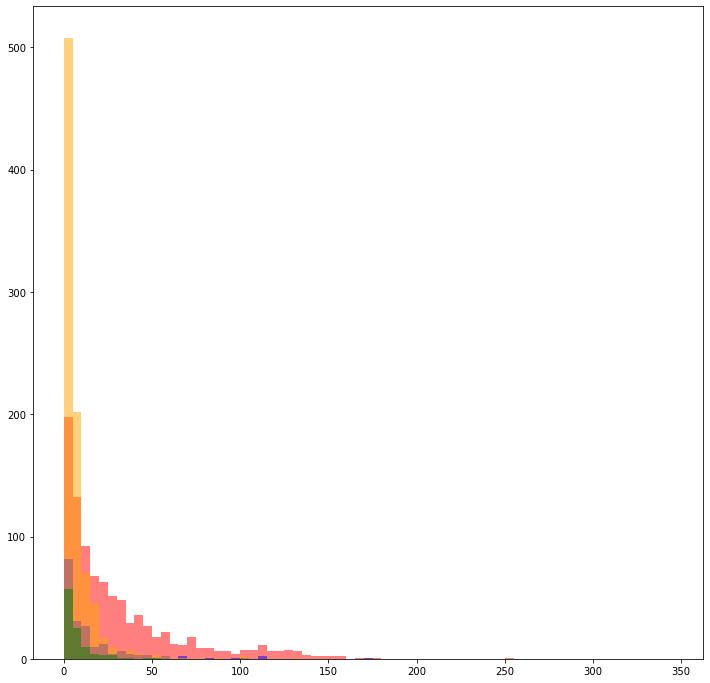

In [36]:
plt.figure(1, figsize=(12, 12))
binrange = np.arange(0, 350, 5)
plt.hist(areas[True_Positive1==1], color='r', alpha=0.5, bins=binrange)
plt.hist(areas[False_Positive1==1], color='b', alpha=0.5, bins=binrange)
plt.hist(areas[True_Negative1==1], color='orange', alpha=0.5, bins=binrange)
plt.hist(areas[False_Negative1==1], color='green', alpha=0.5, bins=binrange)

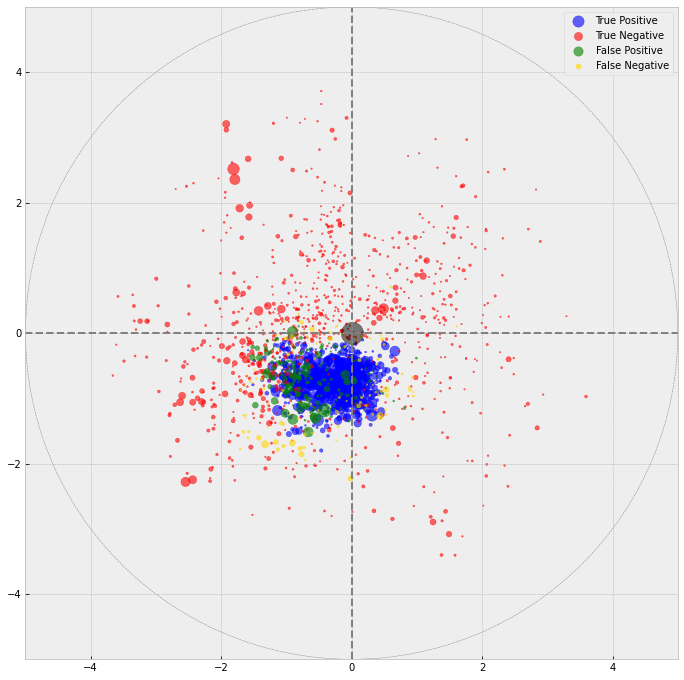

In [37]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=5.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
h.ax.scatter(xc[np.where(True_Positive1==1.0)], yc[np.where(True_Positive1==1.0)], s=areas[np.where(True_Positive1==1.0)], color='blue', alpha=0.6, marker='o', label='True Positive')
h.ax.scatter(xc[np.where(True_Negative1==1.0)], yc[np.where(True_Negative1==1.0)], s=areas[np.where(True_Negative1==1.0)], color='red', alpha=0.6, marker='o', label='True Negative')
h.ax.scatter(xc[np.where(False_Positive1==1.0)], yc[np.where(False_Positive1==1.0)], s=areas[np.where(False_Positive1==1.0)], color='green', alpha=0.6, marker='o', label='False Positive')
h.ax.scatter(xc[np.where(False_Negative1==1.0)], yc[np.where(False_Negative1==1.0)], s=areas[np.where(False_Negative1==1.0)], color='gold', alpha=0.6, marker='o', label='False Negative')
h.ax.scatter([0], [0], s=500, color='k', alpha=0.5, marker='o')
plt.legend()
#plt.savefig('NewArcConfusionHodo.png')
#plt.savefig('hodograph_plot.png')

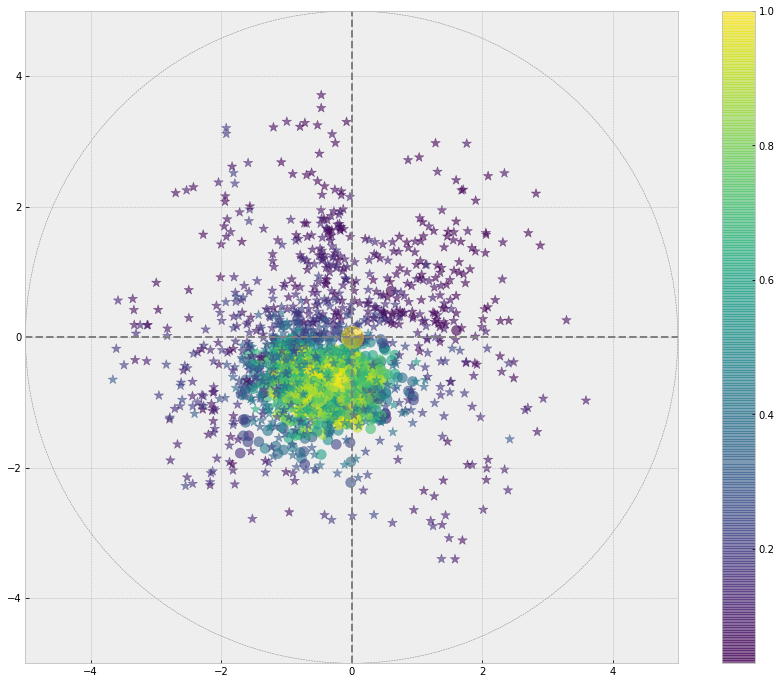

In [38]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=5.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
sc_arc = h.ax.scatter(xc[np.where(columns==1.0)], yc[np.where(columns==1.0)], s=100, c=prob_whole_dataset_new[:,1][np.where(columns==1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='o', norm=None)
h.ax.scatter(xc[np.where(columns<1.0)], yc[np.where(columns<1.0)], s=100, c=prob_whole_dataset_new[:,1][np.where(columns<1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='*', norm=None)
h.ax.scatter([0], [0], s=500, color='gold', alpha=0.5, marker='o')
plt.colorbar(sc_arc)
#plt.savefig('NewArcHodograph.png')

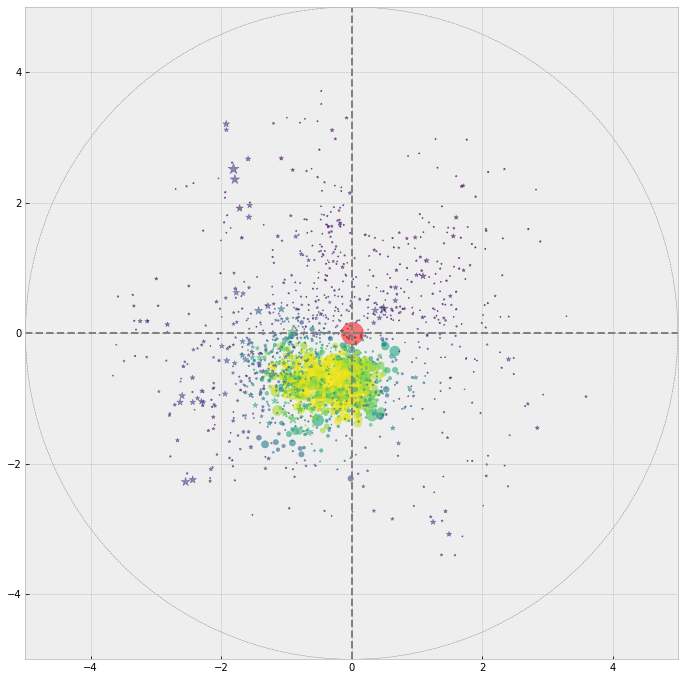

In [39]:
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=5.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=5)
h.ax.scatter(xc[np.where(columns==1.0)], yc[np.where(columns==1.0)], s=areas[np.where(columns==1.0)], c=prob_whole_dataset_new[:,1][np.where(columns==1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='o', norm=None)
h.ax.scatter(xc[np.where(columns<1.0)], yc[np.where(columns<1.0)], s=areas[np.where(columns<1.0)], c=prob_whole_dataset_new[:,1][np.where(columns<1.0)], cmap=plt.cm.viridis, alpha=0.6, marker='*', norm=None)
h.ax.scatter([0], [0], s=500, color='r', alpha=0.5, marker='o')

In [40]:
print(np.min(COL_Y1))
print(np.max(COL_Y1))

0.0
1.0


In [41]:
#Try the gridCV forest optimization technique
#Only run this once since it takes forever
#forest_new_CV = RandomForestClassifier(random_state=123)

In [42]:
# model_params = {
#     'n_estimators': [50, 100, 250, 500, 1000],
#     'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
#     'min_samples_split': [2, 4, 6]
# }

In [43]:
#clf3 = GridSearchCV(forest_new_CV, model_params, cv=10)

In [44]:
#model3 = clf3.fit(ARC_X1, ARC_Y1)

In [45]:
# print winning set of hyperparameters
# from pprint import pprint
# pprint(model3.best_estimator_.get_params())

In [46]:
# print(model3.best_estimator_)
# best_classifier_cv = model3.best_estimator_

In [47]:
# accuracies_cv1 = []

# for train_index, test_index in kf1.split(ARC_X1, ARC_Y1):
#     #print(train_index.shape)
#     #print(test_index.shape)
#     trainX_ARC1 = ARC_X1[train_index]
#     testX_ARC1 = ARC_X1[test_index]
#     trainY_ARC1 = ARC_Y1[train_index]
#     testY_ARC1 = ARC_Y1[test_index]

#     print(trainX_ARC1.shape)
#     best_classifier_cv.fit(trainX_ARC1, trainY_ARC1)
#     #print(forest1.oob_score.real)
#     print('Accuracy: \n', best_classifier_cv.score(testX_ARC1, testY_ARC1))
#     accuracies_cv1.append(best_classifier_cv.score(testX_ARC1, testY_ARC1))

In [48]:
#print(np.mean(accuracies_cv1))

In [49]:
#print('Accuracy: \n', best_classifier_cv.score(ARC_X, ARC_Y))

In [50]:
import pickle
# #Save off the best-performing forest as a pickle file!
# filename = 'NewDataRandomForest_COLUMNS.pkl'
# pickle.dump(forest_all, open(filename, 'wb'))

In [62]:
stampfile = pickle.load(open('Stamps2013417KFDR.pkl', 'rb'))
Z_pmm_all = pickle.load(open('Z_all_pmm.pkl', 'rb'))
print(Z_pmm_all.shape)

(99, 99)


In [52]:
REF_p = stampfile[0]
lon_p = stampfile[1]
lat_p = stampfile[2]
post_lons = stampfile[3]
post_lats = stampfile[4]
ZDR_stamps = stampfile[5]
KDP_stamps = stampfile[6]
CC_stamps = stampfile[7]
#zdr_mask_stamps = stampfile[8]

In [53]:
cenlon = post_lons[5]
cenlat = post_lats[5]

In [54]:
REF_avgarr = np.zeros((REF_p[0].shape[0], REF_p[0].shape[1], len(REF_p)))
ZDR_avgarr = np.zeros((ZDR_stamps[0].shape[0], ZDR_stamps[0].shape[1], len(ZDR_stamps)))

print(REF_avgarr.shape)
for i in range(len(REF_p)):
    REF_avgarr[:,:,i] = REF_p[i]
    ZDR_avgarr[:,:,i] = ZDR_stamps[i]    

(100, 100, 27)


In [55]:
REF_avg = np.mean(REF_avgarr, axis=2)
ZDR_avg = np.mean(ZDR_avgarr, axis=2)

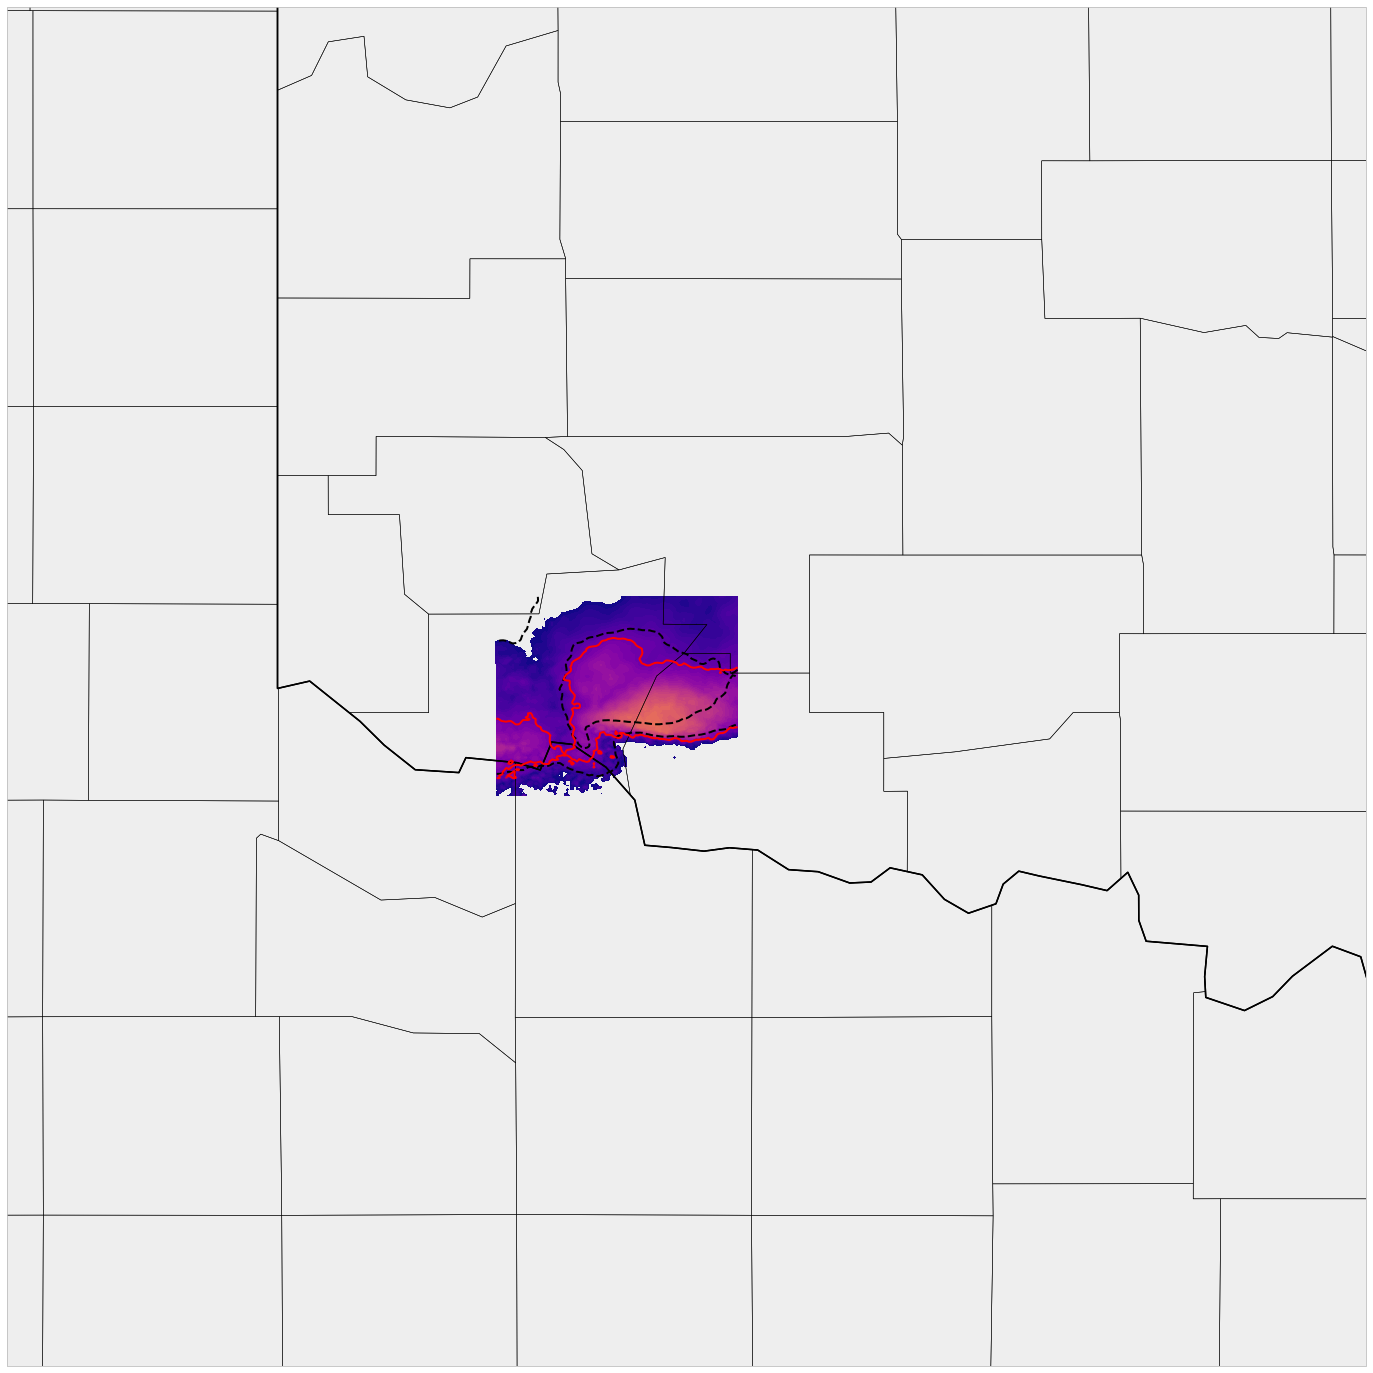

In [56]:
#Let's set up the map projection!
#print('Set up our projection')
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
# Limit the extent of the map area, must convert to proper coords.
LL = (cenlon-1.5,cenlat-1.5,ccrs.PlateCarree())
UR = (cenlon+1.5,cenlat+1.5,ccrs.PlateCarree())
#print(LL)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='50m',
        facecolor='none')
#Make sure these shapefiles are in the same directory as the script
fname = 'cb_2016_us_county_20m/cb_2016_us_county_20m.shp'
fname2 = 'cb_2016_us_state_20m/cb_2016_us_state_20m.shp'
counties = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
states = ShapelyFeature(Reader(fname2).geometries(),ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black')
#Create a figure and plot up the initial data and contours for the algorithm
fig=plt.figure(1,figsize=(30.,25.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(counties, edgecolor = 'black', linewidth = 0.5)
ax.add_feature(states, edgecolor = 'black', linewidth = 1.5)
ax.set_extent([LL[0],UR[0],LL[1],UR[1]])
REFlevels = np.arange(0,73,2)
ZDRlevels = np.arange(1,6,0.1)
KDPlevels = np.arange(0,6,0.1)
#plt.contour(rlons_2d, rlats_2d, REF, [35])
#plt.scatter(postlon, postlat, s=200, zorder=10)
#plt.scatter(rlons_2d[xminlon, yminlon], rlats_2d[xminlat, yminlat], s=200)
#plt.contourf(lonpost, latpost, REFpost, REFlevels, cmap = 'HomeyerRainbow')
# for i in range(len(REF_p)):
# #    try:
#plt.contourf(lon_p[0], lat_p[0], REF_avg, REFlevels, cmap ='jet')
plt.contour(lon_p[0], lat_p[0], REF_avg, [20,40], colors='k', linestyles='--')

plt.contourf(lon_p[0], lat_p[0], ZDR_avg, ZDRlevels, cmap =plt.cm.plasma)
plt.contour(lon_p[0], lat_p[0], ZDR_avg, [2], colors='r')

    #plt.contourf(lon_p[i], lat_p[i], ZDR_stamps[i], ZDRlevels, cmap = plt.cm.plasma)
#     try:
#         #plt.contourf(lon_p[i], lat_p[i], ZDR_p_mask[i], ZDRlevels, cmap = plt.cm.plasma)
#     except:
#         continue
    #plt.contourf(lon_p[i], lat_p[i], KDP_stamps[i], KDPlevels, cmap = plt.cm.gist_ncar)
    
#    except:
#        print("uh oh, problem with", i)
plt.show()        

In [57]:
#Create some dummy distances in km for the mean reflectivity array
x_d = np.arange(-25, 25, 0.5)
y_d = np.arange(-25, 25, 0.5)

x_d1, y_d1 = np.meshgrid(x_d, y_d)
print(x_d.shape)
print(x_d)

(100,)
[-25.  -24.5 -24.  -23.5 -23.  -22.5 -22.  -21.5 -21.  -20.5 -20.  -19.5
 -19.  -18.5 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5
 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5
  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5
  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5
   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5
  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5
  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5
  23.   23.5  24.   24.5]


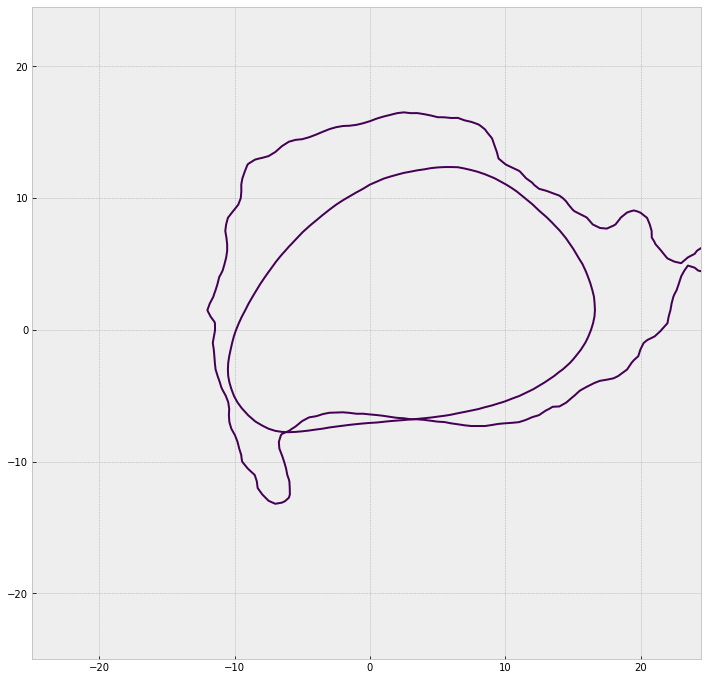

In [67]:
fig=plt.figure(1,figsize=(12.,12.))
plt.contour(x_d1, y_d1, REF_avg, [40])
plt.contour(x_d1[0:99, 0:99], y_d1[0:99, 0:99], Z_pmm_all, [40])

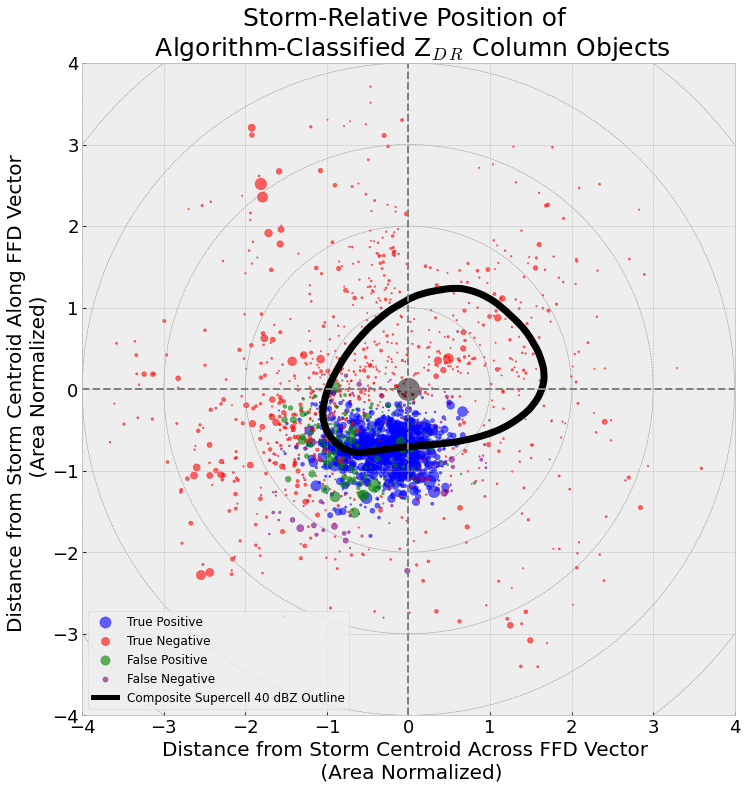

In [77]:
import matplotlib.lines as mlines
%matplotlib inline
plt.style.use('bmh')
#plt.title('21 UTC NARR Sounding 31 May 1985 Wheatland, PA')
# Change default to be better for skew-T
fig = plt.figure(figsize=(16, 12))
skew = plt.subplot()
h = Hodograph(skew, component_range=5.)
#h = Hodograph(ax_hod, component_range=80.)
#h.add_grid(increment=20)
#ax = fig.add_subplot(gs[0, 0])
#h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=1)
tp=h.ax.scatter(xc[np.where(True_Positive1==1.0)], yc[np.where(True_Positive1==1.0)], s=areas[np.where(True_Positive1==1.0)], color='blue', alpha=0.6, marker='o', label='True Positive')
tn=h.ax.scatter(xc[np.where(True_Negative1==1.0)], yc[np.where(True_Negative1==1.0)], s=areas[np.where(True_Negative1==1.0)], color='red', alpha=0.6, marker='o', label='True Negative')
fp=h.ax.scatter(xc[np.where(False_Positive1==1.0)], yc[np.where(False_Positive1==1.0)], s=areas[np.where(False_Positive1==1.0)], color='green', alpha=0.6, marker='o', label='False Positive')
fn=h.ax.scatter(xc[np.where(False_Negative1==1.0)], yc[np.where(False_Negative1==1.0)], s=areas[np.where(False_Negative1==1.0)], color='purple', alpha=0.6, marker='o', label='False Negative')
h.ax.scatter([0], [0], s=500, color='k', alpha=0.5, marker='o')
h.ax.contour(x_d1[0:99, 0:99]/10, y_d1[0:99, 0:99]/10, Z_pmm_all, [40], colors='k', linewidths=7)
storm_outline = mlines.Line2D([], [], color='k', linewidth = 5, linestyle = 'solid', label='Composite Supercell 40 dBZ Outline')
plt.title('Storm-Relative Position of \n Algorithm-Classified Z$_D$$_R$ Column Objects', size=25)
plt.ylabel('Distance from Storm Centroid Along FFD Vector \n (Area Normalized)', size=20)
plt.xlabel('Distance from Storm Centroid Across FFD Vector \n (Area Normalized)', size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(handles=[tp,tn,fp,fn,storm_outline], fontsize=12)
#plt.savefig('NewArcConfusionHodo.png')
#plt.savefig('hodograph_figure1.png')
plt.savefig('Columns_SPORK_RF2.png')
